In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset", quiet=True)

Skipping, found downloaded files in "./breast-cancer-dataset" (use force=True to force download)


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
# every run will give (almost) the same results
import torch, numpy as np, random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

In [5]:
df = pd.read_csv("/content/breast-cancer-dataset/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# we will remove the id column and make changes in the original dataset using inplace=True
df.drop(columns=['id'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# train and test data split
# train data will get all the columns except 1st one
# test data will get the 1st column that is 'diagnosis'
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], df.iloc[:,0], test_size=0.2, stratify=df.iloc[:,0], random_state=42)

In [8]:
# we could see in training data, all the values inside all columns are not on equal level,
# so we will make them in equal level values
# using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# we have seen that the 'diagnosis' column is either M or B so we need to change it to M=1 and B=0 and
# diagnosis column is kept for test data so we will amke changes in test data
# label encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [10]:
# we need to convert this numpy array into PyTorch Tensor
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)


# we have done this as the Pytorch tensors are using float64 and while our model’s weights are float32. PyTorch cannot multiply Float × Double matrices.
# so we have converted to tensors to float32
X_train_tensor = X_train_tensor.to(device).float()
X_test_tensor = X_test_tensor.to(device).float()
y_train_tensor = y_train_tensor.to(device).float()
y_test_tensor = y_test_tensor.to(device).float()

In [11]:
from torch.utils.data import Dataset,DataLoader
# its actually DataLoader(Dataset)

class CustomDataset(Dataset):
  def __init__(self,input_data,output_data):
    self.input_data = input_data
    self.output_data = output_data
  def __len__(self):
    return len(self.input_data)
  def __getitem__(self,index):
    return self.input_data[index],self.output_data[index]

# we now need to create object of this class and it will automatically call the constructor that is __init__ method
train_dataset = CustomDataset(X_train_tensor,y_train_tensor)
test_dataset = CustomDataset(X_test_tensor,y_test_tensor)

# now we need to call the DataLoader class --> which will create mini batches (in our case we took 32 batches )-> like this --> DataLoader(Dataset)
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)  # shuffle=True means shuffle the batch's data
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [12]:
# now we will define our model
class MySimpleNN(nn.Module):
  def __init__(self,input_data):
    super().__init__() # this means we are calling the nn.Module class constructor here
    # this means we have some input neurons and 1=output layer
    self.hidden = nn.Linear(input_data.shape[1], 16)  # hidden layer
    self.relu = nn.ReLU()  # With ReLU: each layer can bend and twist, so you can capture curves, patterns, and complicated relationships in your data
    self.output_layer = nn.Linear(16, 1)
    self.sigmoid = nn.Sigmoid() # we will use Sigmoid activation function which is used for binary classification problem
  def forward(self,input_data):
    x = self.hidden(input_data)
    x = self.relu(x)
    x = self.output_layer(x)
    x = self.sigmoid(x)
    return x

# print(X_train_tensor.shape[1] )  --> torch.Size([455, 30]) --> but we only want the input columns that is 30, so we will write .shape[1]
model = MySimpleNN(X_train_tensor).to(device)


In [13]:
# this will show us the summary of the model we created in above cell
from torchsummary import summary
summary(model,(X_train_tensor.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]             496
              ReLU-2                   [-1, 16]               0
            Linear-3                    [-1, 1]              17
           Sigmoid-4                    [-1, 1]               0
Total params: 513
Trainable params: 513
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [14]:
learning_rate = 0.01 # we define this when our model error rate doesnot reduces after a certain no of epochs then we will lower our error by 0.1
epochs = 25 # no of times we want our MySimpleNN model to run

#Rule of Thumb

# 1- Small/Medium dataset, simple binary classifier: Adam
# 2- Huge dataset, deep network, care about generalization: SGD
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)  # we use optimzer to tell us how we can reduce the error

loss_function = nn.BCELoss() # works best for binary classification that is predict either M or B

In [15]:
# Training Pipeline
total_loss_train_plot = []

for epoch in range(epochs):
  total_loss_train = 0
  for input_features,output_labels in train_loader:  # train_loader contains train data(means X_train_tensor and y_train_tensor)
    # move both to device (GPU or CPU) --> this is optional
    input_features, output_labels = input_features.to(device), output_labels.to(device)
    # first we will do forward propogation
    y_prediction = model(input_features)
    # then we will calculate the loss function as we have used BCELoss
    loss = loss_function(y_prediction,output_labels.unsqueeze(1))
    total_loss_train += loss.item()
    # then we will clear the old gradients and set it to 0
    optimizer.zero_grad()
    # then we will do back propogation
    loss.backward()
    # then we will update the new weights in the model
    optimizer.step()

  avg_loss = total_loss_train / len(train_loader)  # average loss per batch
  total_loss_train_plot.append(avg_loss)
  print(f"Epoch number: {epoch+1} Loss: {avg_loss:.4f}")




Epoch number: 1 Loss: 0.6588
Epoch number: 2 Loss: 0.6205
Epoch number: 3 Loss: 0.5892
Epoch number: 4 Loss: 0.5629
Epoch number: 5 Loss: 0.5320
Epoch number: 6 Loss: 0.4973
Epoch number: 7 Loss: 0.4746
Epoch number: 8 Loss: 0.4502
Epoch number: 9 Loss: 0.4219
Epoch number: 10 Loss: 0.3972
Epoch number: 11 Loss: 0.3748
Epoch number: 12 Loss: 0.3606
Epoch number: 13 Loss: 0.3384
Epoch number: 14 Loss: 0.3188
Epoch number: 15 Loss: 0.3073
Epoch number: 16 Loss: 0.2912
Epoch number: 17 Loss: 0.2832
Epoch number: 18 Loss: 0.2638
Epoch number: 19 Loss: 0.2536
Epoch number: 20 Loss: 0.2556
Epoch number: 21 Loss: 0.2340
Epoch number: 22 Loss: 0.2274
Epoch number: 23 Loss: 0.2189
Epoch number: 24 Loss: 0.2095
Epoch number: 25 Loss: 0.2066


In [16]:
# Evaluation of the model on the test dataset

model.eval() # this means dont train the model now. switch it off
accuracy_list = []
with torch.no_grad(): # means dont do differentiation or any other AutoGrad() work
  for input_features, output_labels in test_loader:
    input_features, output_labels = input_features.to(device), output_labels.to(device)
    y_prediction = model(input_features)
    y_prediction = (y_prediction>0.5).float()
    accuracy = (y_prediction==output_labels.unsqueeze(1)).float().mean()
    accuracy_list.append(accuracy.item())

overall_accuracy = sum(accuracy_list)/len(accuracy_list)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

Overall Accuracy: 0.9470


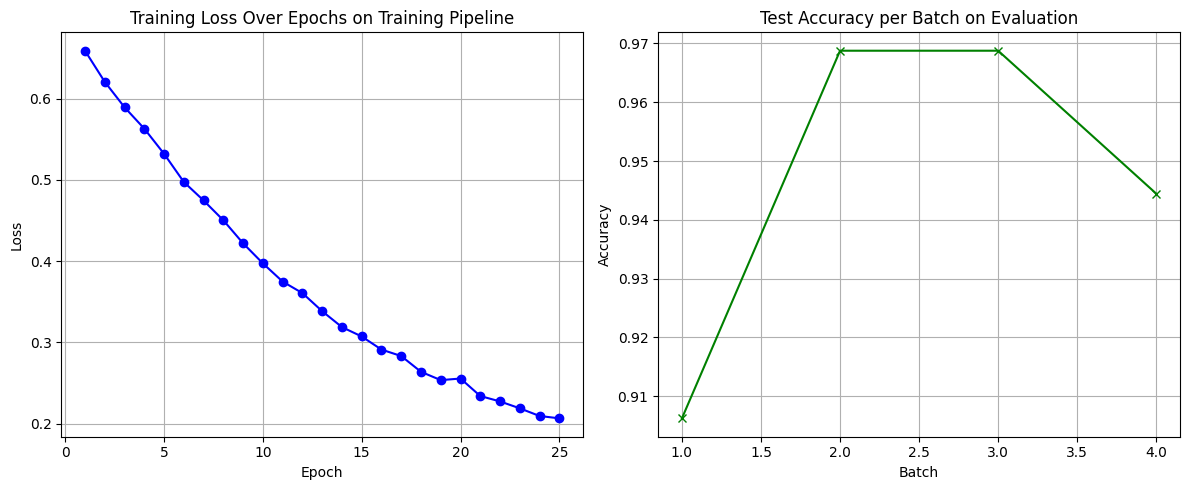

In [17]:
# plotting on subplots

import matplotlib.pyplot as plt

# Creating figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss
axes[0].plot(range(1, len(total_loss_train_plot)+1), total_loss_train_plot, color='blue', marker='o')
axes[0].set_title("Training Loss Over Epochs on Training Pipeline")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].grid(True)

# Plot test accuracy
axes[1].plot(range(1, len(accuracy_list)+1), accuracy_list, color='green', marker='x')
axes[1].set_title("Test Accuracy per Batch on Evaluation")
axes[1].set_xlabel("Batch")
axes[1].set_ylabel("Accuracy")
axes[1].grid(True)

plt.tight_layout()
plt.show()
